In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import scipy.stats as stat
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
raw_data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
raw_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
raw_data.shape

(1436, 38)

In [6]:
raw_data.duplicated().any()

False

In [12]:
raw_data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [13]:
raw_data = raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [16]:
toyota_corolla = raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_corolla.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [22]:
toyota_corolla.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [25]:
toyota_corolla[toyota_corolla.duplicated()].shape

(1, 9)

In [26]:
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [27]:

toyota_corolla = toyota_corolla.drop_duplicates().reset_index(drop=True)
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [28]:
discrete_feature = [feature for feature in toyota_corolla.columns if len(toyota_corolla[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [29]:
continuous_feature = [feature for feature in toyota_corolla.columns if toyota_corolla[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [36]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm', plot=pylab)

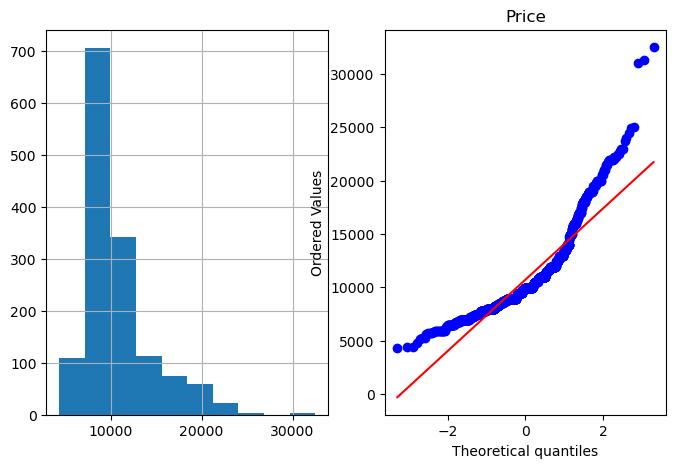

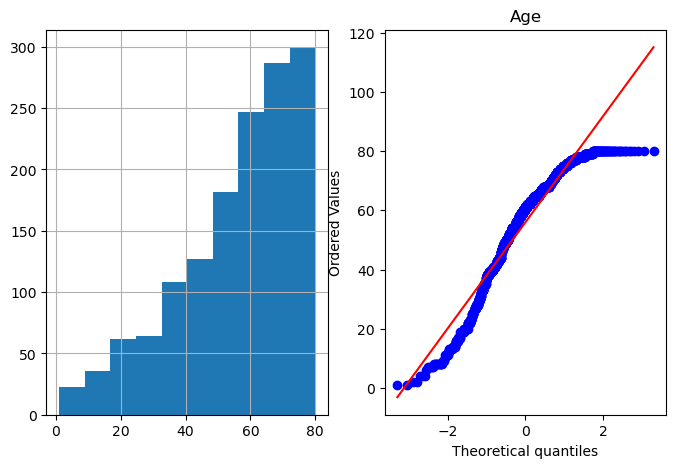

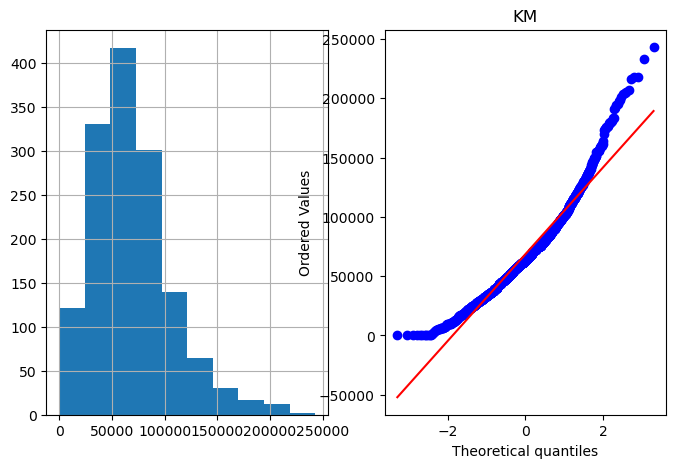

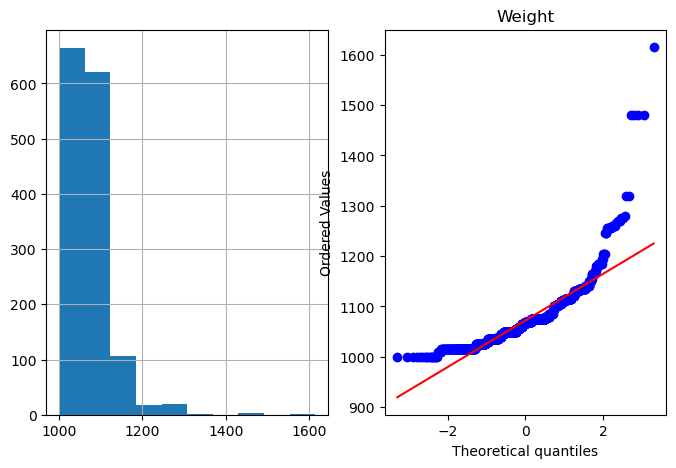

In [37]:
plot_data(toyota_corolla,'Price')
plt.title('Price')
plot_data(toyota_corolla,'Age')
plt.title('Age')
plot_data(toyota_corolla,'KM')
plt.title('KM')
plot_data(toyota_corolla,'Weight')
plt.title('Weight')
plt.show()

In [38]:
toyota_corolla.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [39]:
from scipy.stats import shapiro

In [40]:
print('Price feature  :',shapiro(toyota_corolla.Price),'\n'
      'Age feature    :',shapiro(toyota_corolla.Age),'\n'
      'Weight feature :',shapiro(toyota_corolla.Weight),'\n'
      'KM feature     :',shapiro(toyota_corolla.KM))

Price feature  : ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature    : ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature : ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature     : ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


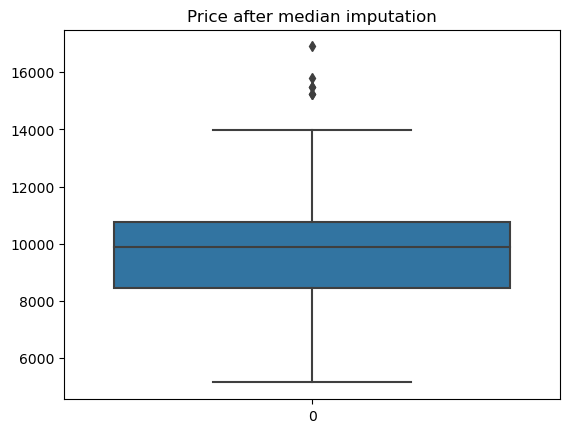

In [42]:
toyota_corolla4 = toyota_corolla.copy()
for i in toyota_corolla['Price']:
    q1 = np.quantile(toyota_corolla4.Price,0.25)
    q3 = np.quantile(toyota_corolla4.Price,0.75)
    med = np.median(toyota_corolla4.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla4['Price'] = toyota_corolla4['Price'].replace(i, np.median(toyota_corolla4['Price']))
sns.boxplot(toyota_corolla4['Price'])
plt.title('Price after median imputation')
plt.show()

In [43]:
median_imputation_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla4).fit()

In [44]:
print('R-squared     :',median_imputation_model.rsquared.round(3))
print('Adj.R-squared :',median_imputation_model.rsquared_adj.round(3))

R-squared     : 0.365
Adj.R-squared : 0.364


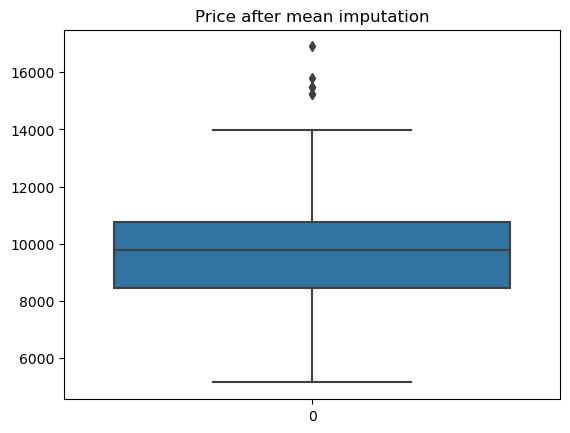

In [45]:
toyota_corolla5 = toyota_corolla.copy()
for i in toyota_corolla['Price']:
    q1 = np.quantile(toyota_corolla5.Price,0.25)
    q3 = np.quantile(toyota_corolla5.Price,0.75)
    med = np.median(toyota_corolla5.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla5['Price'] = toyota_corolla5['Price'].replace(i, np.mean(toyota_corolla5['Price']))
sns.boxplot(toyota_corolla5['Price'])
plt.title('Price after mean imputation')
plt.show()

In [46]:
mean_imputation_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla5).fit()

In [47]:
print('R-squared     :',mean_imputation_model.rsquared.round(3))
print('Adj.R-squared :',mean_imputation_model.rsquared_adj.round(3))

R-squared     : 0.407
Adj.R-squared : 0.406


In [48]:
toyota_corolla6 = toyota_corolla.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

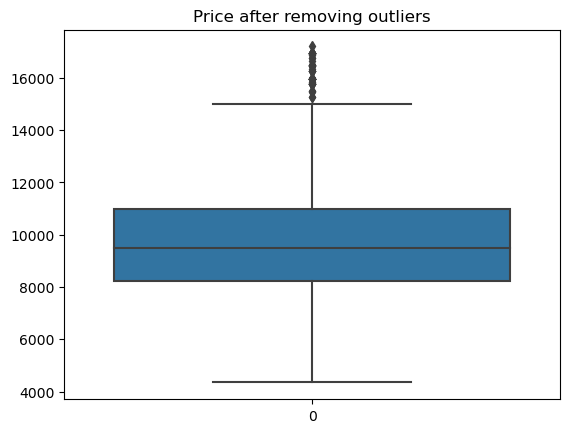

In [49]:
drop_outliers(toyota_corolla6, 'Price')
sns.boxplot(toyota_corolla6.Price)
plt.title('Price after removing outliers')
plt.show()

In [50]:
removed_outlier_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla6).fit()

In [51]:
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.773
Adj.R-squared : 0.773


In [52]:
np.sqrt(removed_outlier_model.mse_resid)

1127.376058284516

In [53]:
cube_root_transfomed = toyota_corolla.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price ~ Age + KM + Weight", data = cube_root_transfomed).fit()

In [54]:
print('R-squared     :',cube_root_transformed_model.rsquared.round(3))
print('Adj.R-squared :',cube_root_transformed_model.rsquared_adj.round(3))

R-squared     : 0.815
Adj.R-squared : 0.814


In [55]:
toyota_corolla.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [57]:
raw_data_model = smf.ols("Price ~ Age + KM + Weight + HP + CC + Gears + QT + Doors", data = toyota_corolla).fit()

In [58]:
print('R-squared     :',raw_data_model.rsquared.round(3))
print('Adj.R-squared :',raw_data_model.rsquared_adj.round(3))

R-squared     : 0.863
Adj.R-squared : 0.862


In [59]:
np.sqrt(raw_data_model.mse_resid)

1341.8046186938675

In [60]:
influence_points = raw_data_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
        8.04110550e-07, 6.99854767e-04, 1.08408002e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

In [61]:
k = toyota_corolla.shape[1]
n = toyota_corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,3))

Cut-off line at 0.021


In [62]:
np.argmax(c), np.max(c)

(80, 78.7295058224947)

In [63]:
toyota_corolla[toyota_corolla.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [64]:
dataframe = toyota_corolla.copy()
dataframe = dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [66]:
toyota_corolla.shape

(1435, 9)

In [68]:
k = dataframe.shape[1]
n = dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n

In [69]:
while np.max(c)>leverage_cutoff:
    model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=dataframe).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe = dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("This model accuracy is improved to",final_model.rsquared)

This model accuracy is improved to 0.8960864004304145


In [70]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([8.18666846e-03, 4.24327306e-03, 5.81580166e-03, ...,
        3.22220537e-03, 2.45735541e-05, 1.47560469e-03]),
 array([0.99999999, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]))

In [71]:
dataframe.shape

(1415, 9)

In [72]:
dataframe

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1410,8450,80,23000,86,1300,3,5,69,1015
1411,7500,69,20544,86,1300,3,5,69,1025
1412,10845,72,19000,86,1300,3,5,69,1015
1413,8500,71,17016,86,1300,3,5,69,1015


In [73]:
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))
print('P-Value       :\n',final_model.pvalues)

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 23903.282
BIC Value     : 23950.576
P-Value       :
 Intercept     2.733015e-27
Age          3.627978e-295
KM            4.977130e-50
HP            2.180827e-22
CC            1.232179e-29
Doors         8.605230e-05
Gears         7.525499e-02
QT            4.472354e-01
Weight       1.706006e-118
dtype: float64


In [74]:
log_scaled = pd.DataFrame()
log_scaled['Age'] = np.log(dataframe.Age)
log_scaled['Price'] = np.log(dataframe.Price)
log_scaled['KM'] = np.log(dataframe.KM)
log_scaled['Weight'] = np.log(dataframe.Weight)
log_scaled['CC'] = dataframe['CC']
log_scaled['Doors'] = dataframe['Doors']
log_scaled['HP'] = dataframe['HP']
log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP
0,3.135494,9.510445,10.757605,7.060476,2000,3,90
1,3.135494,9.528794,11.197351,7.060476,2000,3,90
2,3.178054,9.543235,10.638520,7.060476,2000,3,90
3,3.258097,9.612467,10.778956,7.060476,2000,3,90
4,3.401197,9.528794,10.558414,7.064759,2000,3,90


In [75]:
log_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Weight", data = log_scaled).fit()

In [76]:
print('R-squared     :',log_transformed_model.rsquared.round(3))
print('Adj.R-squared :',log_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',log_transformed_model.aic.round(3))
print('BIC Value     :',log_transformed_model.bic.round(3))
print('P-Value       :\n',log_transformed_model.pvalues)

R-squared     : 0.765
Adj.R-squared : 0.764
AIC Value     : -1548.485
BIC Value     : -1511.7
P-Value       :
 Intercept     8.493950e-02
Age          4.981353e-161
KM            2.952951e-02
HP            8.599057e-38
CC            8.884675e-14
Doors         9.199160e-01
Weight        4.433340e-24
dtype: float64


In [77]:
cbrt_scaled = pd.DataFrame()
cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
cbrt_scaled['CC'] = dataframe['CC']
cbrt_scaled['QT'] = dataframe['QT']
cbrt_scaled['Doors'] = dataframe['Doors']
cbrt_scaled['Gears'] = dataframe['Gears']
cbrt_scaled['HP'] = dataframe['HP']
cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.811016,36.084677,10.522251,2000,210,3,5,90
1,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
2,2.884499,24.072696,34.680355,10.522251,2000,210,3,5,90
3,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
4,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90


In [78]:
cbrt_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = cbrt_scaled).fit()

In [79]:
print('R-squared     :',cbrt_transformed_model.rsquared.round(3))
print('Adj.R-squared :',cbrt_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',cbrt_transformed_model.aic.round(3))
print('BIC Value     :',cbrt_transformed_model.bic.round(3))
print('P-Value       :\n',cbrt_transformed_model.pvalues)

R-squared     : 0.86
Adj.R-squared : 0.859
AIC Value     : 3442.358
BIC Value     : 3489.652
P-Value       :
 Intercept     1.300129e-01
Age          5.265030e-216
KM            2.226937e-30
HP            1.640337e-29
CC            2.263728e-12
Doors         6.747694e-01
Gears         3.360293e-03
QT            1.705222e-05
Weight        5.008225e-27
dtype: float64


In [80]:
sqrt_scaled = pd.DataFrame()
sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
sqrt_scaled['CC'] = dataframe['CC']
sqrt_scaled['QT'] = dataframe['QT']
sqrt_scaled['Doors'] = dataframe['Doors']
sqrt_scaled['Gears'] = dataframe['Gears']
sqrt_scaled['HP'] = dataframe['HP']
sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,116.189500,216.762543,34.132096,2000,210,3,5,90
1,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
2,4.898979,118.110118,204.232710,34.132096,2000,210,3,5,90
3,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
4,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90


In [81]:
sqrt_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = sqrt_scaled).fit()

In [82]:
print('R-squared     :',sqrt_transformed_model.rsquared.round(3))
print('Adj.R-squared :',sqrt_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',sqrt_transformed_model.aic.round(3))
print('BIC Value     :',sqrt_transformed_model.bic.round(3))
print('P-Value       :\n',sqrt_transformed_model.pvalues)

R-squared     : 0.884
Adj.R-squared : 0.883
AIC Value     : 8754.336
BIC Value     : 8801.63
P-Value       :
 Intercept     6.398002e-04
Age          5.612813e-260
KM            6.195481e-45
HP            5.599709e-28
CC            5.544674e-14
Doors         7.805591e-01
Gears         2.408792e-03
QT            1.687698e-04
Weight        8.644974e-42
dtype: float64


In [83]:
robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = robust_scaled[columns]

In [84]:
scaler=RobustScaler()

In [86]:
robust_scaled[columns] = scaler.fit_transform(features.values)
robust_scaled

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.035226,-1.461538,-0.374898,90,2000,3,5,210,2.222222
1,1.107117,-1.461538,0.215703,90,2000,3,5,210,2.222222
2,1.164630,-1.423077,-0.494948,90,2000,3,5,210,2.222222
3,1.452193,-1.346154,-0.351821,90,2000,3,5,210,2.222222
4,1.107117,-1.192308,-0.568025,90,2000,3,5,210,2.333333
...,...,...,...,...,...,...,...,...,...
1410,-0.416966,0.730769,-0.920778,86,1300,3,5,69,-1.111111
1411,-0.690151,0.307692,-0.976673,86,1300,3,5,69,-0.888889
1412,0.271747,0.423077,-1.011812,86,1300,3,5,69,-1.111111
1413,-0.402588,0.384615,-1.056964,86,1300,3,5,69,-1.111111


In [87]:
robust_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = robust_scaled).fit()

In [88]:
print('R-squared     :',robust_transformed_model.rsquared.round(3))
print('Adj.R-squared :',robust_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',robust_transformed_model.aic.round(3))
print('BIC Value     :',robust_transformed_model.bic.round(3))
print('P-Value       :\n',robust_transformed_model.pvalues)

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 827.267
BIC Value     : 874.561
P-Value       :
 Intercept     1.391592e-01
Age          3.627978e-295
KM            4.977130e-50
HP            2.180827e-22
CC            1.232179e-29
Doors         8.605230e-05
Gears         7.525499e-02
QT            4.472354e-01
Weight       1.706006e-118
dtype: float64


In [89]:
col_names = dataframe.columns
features = dataframe[col_names]

In [92]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
standard_scaled = pd.DataFrame(features, columns = col_names)
standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.812024,-1.792982,-0.581019,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
1,0.883978,-1.792982,0.118411,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
2,0.941541,-1.738892,-0.723191,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
3,1.229357,-1.630713,-0.553690,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
4,0.883978,-1.414355,-0.809733,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.119377


In [96]:
standard_scaler_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = standard_scaled).fit()

In [97]:
print('R-squared     :',standard_scaler_transformed_model.rsquared.round(3))
print('Adj.R-squared :',standard_scaler_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',standard_scaler_transformed_model.aic.round(3))
print('BIC Value     :',standard_scaler_transformed_model.bic.round(3))
print('P-Value       :\n',standard_scaler_transformed_model.pvalues)

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 829.759
BIC Value     : 877.053
P-Value       :
 Intercept     1.000000e+00
Age          3.627978e-295
KM            4.977130e-50
HP            2.180827e-22
CC            1.232179e-29
Doors         8.605230e-05
Gears         7.525499e-02
QT            4.472354e-01
Weight       1.706006e-118
dtype: float64


In [99]:
model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = standard_scaled).fit()

In [100]:
print('R-squared     :',model.rsquared.round(3))
print('Adj.R-squared :',model.rsquared_adj.round(3))
print('AIC Value     :',model.aic.round(3))
print('BIC Value     :',model.bic.round(3))
print('P-Value       :\n',model.pvalues)

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 829.759
BIC Value     : 877.053
P-Value       :
 Intercept     1.000000e+00
Age          3.627978e-295
KM            4.977130e-50
HP            2.180827e-22
CC            1.232179e-29
Doors         8.605230e-05
Gears         7.525499e-02
QT            4.472354e-01
Weight       1.706006e-118
dtype: float64


In [101]:
y = standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Weight,4.04
6,QT,3.39
3,CC,3.16
0,Age,2.06
1,KM,1.93
2,HP,1.69
4,Doors,1.24
5,Gears,1.10


In [103]:
qt_model = smf.ols('Price ~ QT', data= standard_scaled).fit()
print('R-squared     :',qt_model.rsquared.round(3))
print('Adj.R-squared :',qt_model.rsquared_adj.round(3))
print('AIC Value     :',qt_model.aic.round(3))
print('BIC Value     :',qt_model.bic.round(3))
print('P-Value       :\n',qt_model.pvalues)

R-squared     : 0.041
Adj.R-squared : 0.041
AIC Value     : 3959.728
BIC Value     : 3970.238
P-Value       :
 Intercept    1.000000e+00
QT           1.070276e-14
dtype: float64


In [104]:
gears_model = smf.ols('Price ~ Gears', data= standard_scaled).fit()
print('R-squared     :',gears_model.rsquared.round(3))
print('Adj.R-squared :',gears_model.rsquared_adj.round(3))
print('AIC Value     :',gears_model.aic.round(3))
print('BIC Value     :',gears_model.bic.round(3))
print('P-Value       :\n',gears_model.pvalues)

R-squared     : 0.002
Adj.R-squared : 0.001
AIC Value     : 4017.293
BIC Value     : 4027.803
P-Value       :
 Intercept    1.000000
Gears        0.129489
dtype: float64


In [105]:
gears_qt_model = smf.ols('Price ~ Gears+QT', data= standard_scaled).fit()
print('R-squared     :',gears_qt_model.rsquared.round(3))
print('Adj.R-squared :',gears_qt_model.rsquared_adj.round(3))
print('AIC Value     :',gears_qt_model.aic.round(3))
print('BIC Value     :',gears_qt_model.bic.round(3))
print('P-Value       :\n',gears_qt_model.pvalues)

R-squared     : 0.043
Adj.R-squared : 0.042
AIC Value     : 3959.049
BIC Value     : 3974.814
P-Value       :
 Intercept    1.000000e+00
Gears        1.021190e-01
QT           9.037594e-15
dtype: float64


In [108]:
x1 = standard_scaled.drop(['Gears'], axis=1)
y1 = standard_scaled.drop(['Gears','Price'], axis=1)

In [109]:
x1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [110]:
model_1 = smf.ols('Price ~ Age+KM+HP+CC+Doors+QT+Weight', data = x1).fit()
print('R-squared     :',model_1.rsquared.round(3))
print('Adj.R-squared :',model_1.rsquared_adj.round(3))
print('AIC Value     :',model_1.aic.round(3))
print('BIC Value     :',model_1.bic.round(3))
print('P-Value       :\n',model_1.pvalues)

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 830.945
BIC Value     : 872.984
P-Value       :
 Intercept     1.000000e+00
Age          6.835595e-295
KM            1.945624e-49
HP            3.721110e-25
CC            3.459774e-30
Doors         1.134846e-05
QT            3.965621e-01
Weight       3.208736e-119
dtype: float64


In [111]:
toyota_corolla.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [112]:
standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.812024,-1.792982,-0.581019,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
1,0.883978,-1.792982,0.118411,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
2,0.941541,-1.738892,-0.723191,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
3,1.229357,-1.630713,-0.553690,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.013025
4,0.883978,-1.414355,-0.809733,-0.800676,2.351384,-1.081458,-0.150625,3.032691,2.119377


In [113]:
array = standard_scaled.values
x = array[:,1:]
y = array[:,1]

In [114]:
pca_var = PCA()
pca_var.fit(x)

PCA()

In [115]:
var = pca_var.explained_variance_ratio_
var 

array([0.32893705, 0.22985124, 0.14921043, 0.12263703, 0.08421297,
       0.04056493, 0.02379417, 0.02079219])

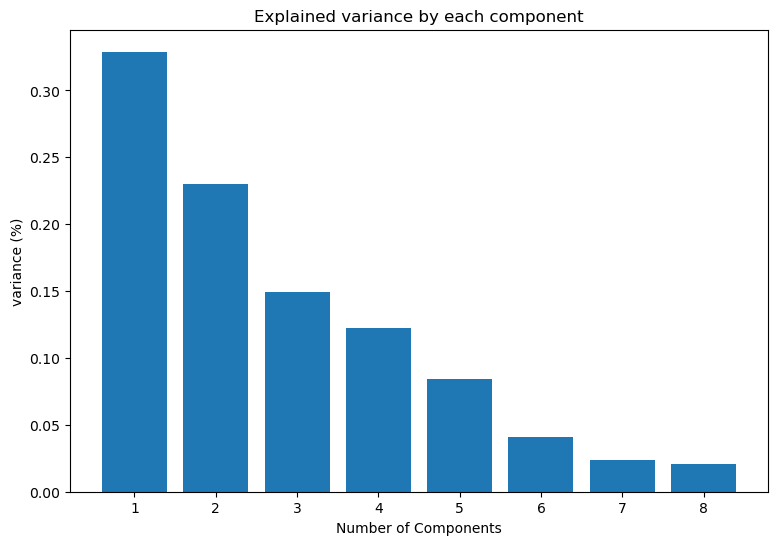

In [116]:
plt.figure(figsize=(9,6))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [117]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 32.89,  55.88,  70.8 ,  83.06,  91.48,  95.54,  97.92, 100.  ])

In [118]:
pca = PCA()
pca_std = pca.fit_transform(x)

In [119]:
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

In [120]:
print(pca_std_df.shape)
pca_std_df.head()

(1415, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721


In [121]:
dataframe.Price

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1410     8450
1411     7500
1412    10845
1413     8500
1414     7250
Name: Price, Length: 1415, dtype: int64

In [122]:
pca_std_df['Price'] = y
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326,-1.792982
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204,-1.792982
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727,-1.738892
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015,-1.630713
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721,-1.414355


In [132]:
pca_model = sm.ols('Price ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
print('R-squared     :',pca_model.rsquared.round(3))
print('Adj.R-squared :',pca_model.rsquared_adj.round(3))
print('AIC Value     :',pca_model.aic.round(3))
print('BIC Value     :',pca_model.bic.round(3))

R-squared     : 1.0
Adj.R-squared : 1.0
AIC Value     : -94502.064
BIC Value     : -94454.77


In [134]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))

In [136]:
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

In [137]:
predict = pd.DataFrame(pca_model.predict(pca_std_df))

In [139]:
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

In [140]:
rmse_linear = (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print("R2_score          : ", pca_model.rsquared)
print("R2_Adjusted_score : ", pca_model.rsquared_adj)
print("RMSE              : ", rmse_linear)

R2_score          :  1.0
R2_Adjusted_score :  1.0
RMSE              :  6753.585802694991


In [141]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.188870,0.241424,-0.340592,-2.298491,0.821049,-0.498966,0.073663,-0.481326,13500
1,4.276369,-0.192878,-0.412960,-2.107000,0.809163,-0.009463,0.178998,-0.468204,13750
2,4.157875,0.300939,-0.331409,-2.315291,0.829087,-0.632062,0.055468,-0.468727,13950
3,4.152659,0.138160,-0.360001,-2.224636,0.837452,-0.580628,0.087427,-0.435015,14950
4,4.127483,0.201474,-0.358977,-2.205313,0.865429,-0.893211,0.072980,-0.293721,13750


In [145]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=10)

In [146]:
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (990, 8)
Shape of X_test  :  (425, 8)
Shape of y_train :  (990,)
Shape of y_test  :  (425,)


In [148]:
transformer_x = StandardScaler().fit(x_train.to_numpy().reshape(-1,1))
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 

In [149]:
x_train_scal = transformer_x.transform(y_train.to_numpy().reshape(-1,1))
x_test_scal = transformer_x.transform(y_test.to_numpy().reshape(-1,1))

In [150]:
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

In [151]:
lin_model=LinearRegression()

In [152]:
lin_model.fit(x_train, y_train_scal)

LinearRegression()

In [153]:
lin_reg_model = LinearRegression().fit(x_train, y_train)

In [154]:
print(lin_reg_model.score(x_train, y_train),lin_reg_model.score(x_test, y_test))

0.896175046994616 0.8942796210716417


In [156]:
prediction = lin_model.predict(x_test)

In [158]:
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [160]:
cv_linear = cross_val_score(estimator = lin_model, X = x_train, y = y_train_scal, cv = 10)

In [163]:
y_pred_linear_train = lin_model.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

In [164]:
y_pred_linear_test = lin_model.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

In [165]:
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                      : ", cv_linear.mean())
print("R2_score (train)        : ", r2_score_all_feature_train)
print("R2_score (test)         : ", r2_score_all_feature_test)
print("RMSE using all features : ", rmse_linear_using_all_features)

CV                      :  0.8893038364607513
R2_score (train)        :  0.8961750469946159
R2_score (test)         :  0.8942796210716418
RMSE using all features :  1140.1824617548932


In [166]:
x2 = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y2 = dataframe[['Price']]

In [167]:
transformer_x = StandardScaler().fit(x2)
transformer_y = StandardScaler().fit(y2)

In [168]:
x_train_scal = transformer_x.transform(x2)
y_train_scal = transformer_y.transform(y2)

In [169]:
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

,Age,KM,HP,CC,Doors,QT,Weight
0,-1.792982,-0.581019,-0.800676,2.351384,-1.081458,3.032691,2.013025
1,-1.792982,0.118411,-0.800676,2.351384,-1.081458,3.032691,2.013025
2,-1.738892,-0.723191,-0.800676,2.351384,-1.081458,3.032691,2.013025
3,-1.630713,-0.553690,-0.800676,2.351384,-1.081458,3.032691,2.013025
4,-1.414355,-0.809733,-0.800676,2.351384,-1.081458,3.032691,2.119377


In [171]:
predict = pd.DataFrame(model_1.predict(x_df))

In [174]:
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

In [175]:
rmse_linear= (np.sqrt(mean_squared_error(y2, predict_unscaled)))
print('R2_score          : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE              : ", rmse_linear)

R2_score          :  0.8958521733950553
R2_Adjusted_score :  0.895334025003986
RMSE              :  1121.2688196518893


In [176]:
x1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [177]:
final_model = smf.ols("Price ~ Age+KM+HP+CC+Doors+QT+Weight", data = x1).fit()

In [178]:
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))

R-squared     : 0.896
Adj.R-squared : 0.895
AIC Value     : 830.945
BIC Value     : 872.984


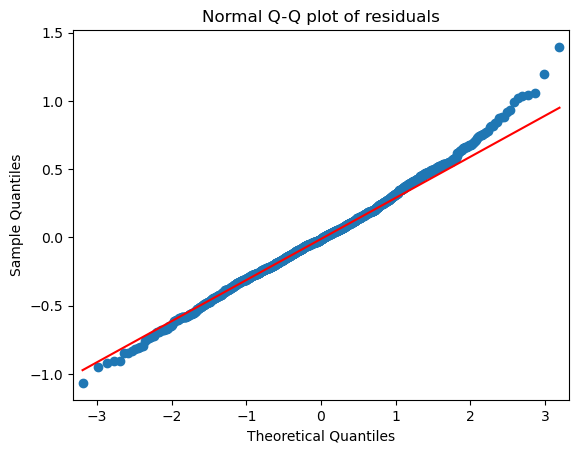

In [179]:
import statsmodels.api as sm
sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [180]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

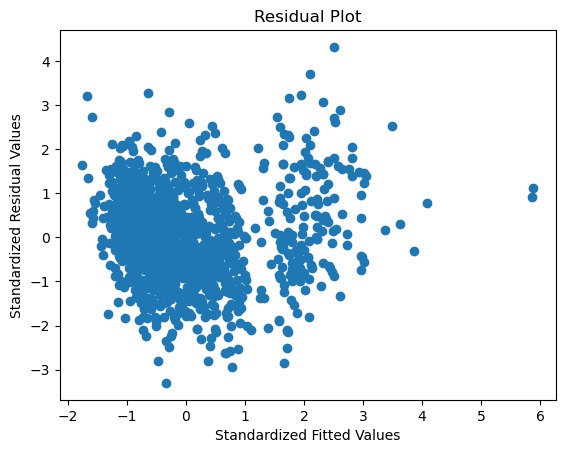

In [181]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [182]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]

In [183]:
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)

In [184]:
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

In [185]:
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

,Age,KM,HP,CC,Doors,QT,Weight
0,-1.792982,-0.581019,-0.800676,2.351384,-1.081458,3.032691,2.013025
1,-1.792982,0.118411,-0.800676,2.351384,-1.081458,3.032691,2.013025
2,-1.738892,-0.723191,-0.800676,2.351384,-1.081458,3.032691,2.013025
3,-1.630713,-0.553690,-0.800676,2.351384,-1.081458,3.032691,2.013025
4,-1.414355,-0.809733,-0.800676,2.351384,-1.081458,3.032691,2.119377


In [187]:
predict = pd.DataFrame(final_model.predict(x_df))

In [188]:
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[16319.5951151 ],
       [15874.06694667],
       [16299.90720081],
       ...,
       [ 8552.16241809],
       [ 8696.47323611],
       [ 8808.43944046]])

In [189]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

1121.2688196518893

In [191]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

,Predicted_Price,Price,Age,KM,Weight,HP,CC,QT,Doors
0,16319.595115,13500,23,46986,1165,90,2000,210,3
1,15874.066947,13750,23,72937,1165,90,2000,210,3
2,16299.907201,13950,24,41711,1165,90,2000,210,3
3,15971.438512,14950,26,48000,1165,90,2000,210,3
4,15857.158394,13750,30,38500,1170,90,2000,210,3
...,...,...,...,...,...,...,...,...,...
1410,7601.495011,8450,80,23000,1015,86,1300,69,3
1411,9183.645071,7500,69,20544,1025,86,1300,69,3
1412,8552.162418,10845,72,19000,1015,86,1300,69,3
1413,8696.473236,8500,71,17016,1015,86,1300,69,3
